In [21]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import nltk 
import re
import string
import streamlit as st
from nltk.stem import WordNetLemmatizer
import joblib

In [19]:
#ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# build pipeline
from sklearn.pipeline import Pipeline

In [20]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LUGAPEDE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('train_data (1).csv')
#rename the columns
name = ['comment', 'outcome']
data.columns = name
data.head()

,comment,outcome
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [6]:
# replace the outcome into numerical
data['outcome'] = data['outcome'].replace(0, 'Negative')
data['outcome'] = data['outcome'].replace(1, 'Positive')

negative    12500
positive    12500
Name: outcome, dtype: int64


<AxesSubplot:xlabel='outcome', ylabel='count'>

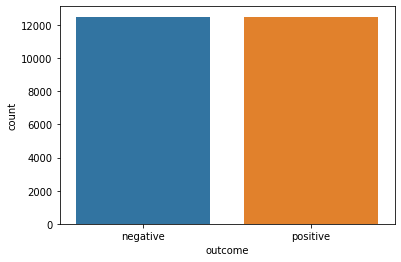

In [11]:
# data cleaning and text preprocessing
print(data['outcome'].value_counts())
sns.countplot(data = data, x = 'outcome')

The data is balanced since we have an equal number

## Text Preprocessing

* Lower the case
* Remove the stopwords
* Remove the punctuation marks
* lemmatize the terms

In [22]:
# lower the cases
data['comment_2'] = data['comment'].apply(str.lower)

In [25]:
# remove the stopwords
data['comment_2'] = data['comment_2'].apply(lambda x : ''.join(w for w in x.split() if w not in stopwords))

In [26]:
#use regex to remove punctuation marks
data['comment_2'] = data['comment_2'].apply(lambda x: re.sub(r'[^\w\s]','', x))

In [30]:
#creation a lemmatization object
def lemmatize_words(text):
    """ function to lemmatize the text"""
    words = text.split()
    words = [lemmatizer.lemmatize(word, pos = 'v') for word in words]
    return ''.join(words)

In [31]:
data['comment_2'] = data['comment_2'].apply(lemmatize_words)

## Splitting and Training the data

In [33]:
x = data.iloc[:,0]
y = data.iloc[:, 1]

In [34]:
train_x, test_x, train_y, test_y = train_test_split(x, y , random_state=42, test_size= 0.2)

In [37]:
# building the pipeline
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [38]:
# train and fitting the data
pipe_lr.fit(train_x, train_y)

C:\Users\LUGAPEDE\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [39]:
#check accuracy
pipe_lr.score(test_x, test_y)

0.8832

In [49]:
# make a predictions
test =' it was very good'
pipe_lr.predict([test])

array(['positive'], dtype=object)

In [50]:
# probability
pipe_lr.predict_proba([test])

array([[0.41350181, 0.58649819]])

In [47]:
pipe_lr.classes_

array(['negative', 'positive'], dtype=object)

In [52]:
import joblib
pipeline_file = open('movie_classifier_2022.pkl', 'wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [70]:
import plotly.express as px
df = pd.DataFrame(pipe_lr.predict_proba([test]), columns=pipe_lr.classes_)
df = df.T.reset_index()

In [72]:
df.columns = ['Review', 'Probability']
df

,Review,Probability
0,negative,0.413502
1,positive,0.586498


In [75]:
fig = px.bar(df, x = 'Review', y = 'Probability' , color = 'Review')
fig.show()

In [5]:
data_2 = data.apply(tuple, axis = 1)
data_2[1]

("Well since seeing part's 1 through 3 I can honestly say that they should have NEVER made part 4. Everything from the tacky, and I DO mean tacky score to the really bad acting, I dare anyone to watch this and not be bored out of their minds.<br /><br />I mean parts 1 to 3 kept the vibe strong on the plot of Damion, but without him around in this one it's just not the same. Sure by the end of part 3 I was getting a little tired of the continued story line's, but it was a good closure at the end of the third one. Again there was no reason for a part 4. Even if there was they could have done a MUCH better job than this sh*t I had to sit through, lol. There goes an hour and a half of my life i'll never see again.",
 0)

In [6]:
data_2 = list(data_2)
len(data_2)

25000

In [8]:
import river
